<a href="https://colab.research.google.com/github/ndtuan10/Image-Processing-And-Applications_CS406.M11.KHCL/blob/main/BaiTap/Image_Enhancement/BaiTap1%3A%20(Threshold%2C%20Contrast%2C%20Brightness%2C%20Invert%2C%20Gamma_Correction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

## **Bài tập 1: Image Enhancement: threshold, contrast, brightness, gamma correction**

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/CS406.M11.KHCL/Baitap/Baitap1/images/'

In [3]:
path_img1 = os.path.join(path,'rice.png')
path_img2 = os.path.join(path,'pout.tif')
path_img3 = os.path.join(path,'field.jpg')
path_img4 = os.path.join(path,'kids.tif')
path_img5 = os.path.join(path,'en_orig.jpg')
path_img6 = os.path.join(path,'mandril.jpg')

In [4]:
def show(img, new_img, title1, title2):
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = plt.imshow(img, interpolation = 'bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    new_img = plt.imshow(new_img, interpolation = 'bicubic')

# **Yêu cầu 1: Phép lấy ngưỡng cho ảnh**

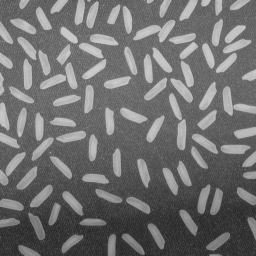

In [5]:
# rice img
img1 = cv2.imread(path_img1)
cv2_imshow(img1)

In [6]:
def threshold(img, T):
    new_img = img.copy()
    w, h, c = img.shape
    for i in range (w):
        for j in range (h):
            for k in range (c):
                if (img[i][j][k]) > T:
                    new_img[i][j][k] = 255
                else:
                    new_img[i][j][k] = 0
    return new_img

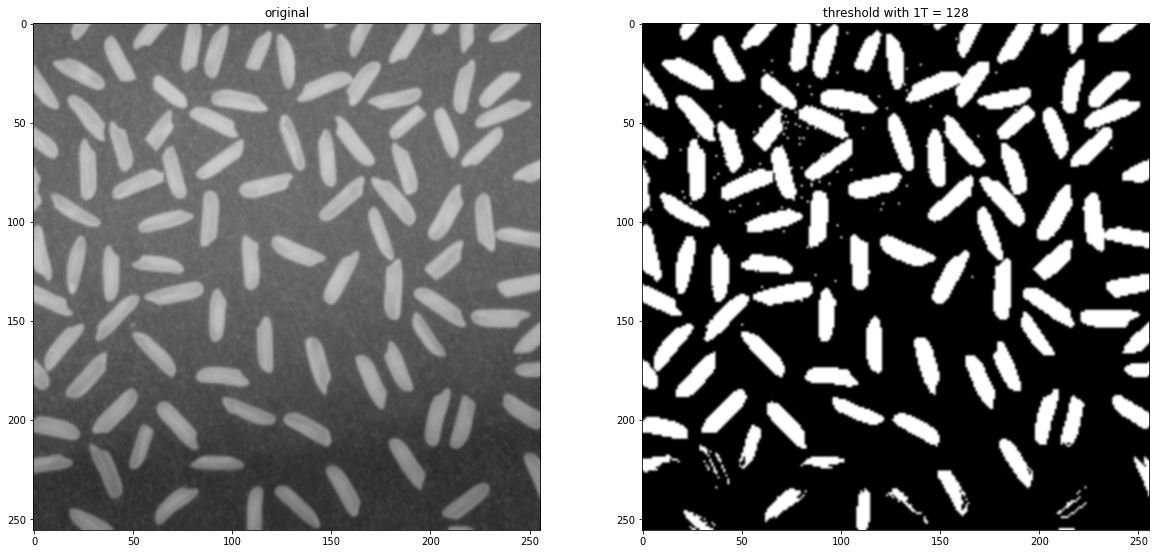

In [7]:
show(img1, threshold(img1, 128), "original", "threshold with 1T = 128")

# **Yêu cầu 2: Tăng độ sáng và độ tương phản cho ảnh (nhập khi thực thi)**

## Công thức: g(x,y) = (f(x,y)-0.5)*alpha + 0.5 + beta với alpha = contrast, beta = brightness

In [8]:
def brightness_and_contrast(f):
    new_img = np.zeros(f.shape, f.dtype)
    alpha = float(input('* Enter the alpha value: ')) # constrast
    beta = int(input('* Enter the beta value: ')) # brightness

    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            for k in range(f.shape[2]):
                new_img[i,j,k] = np.clip(alpha*(f[i,j,k] - 0.5) + 0.5 + beta, 0, 255)
                
    return new_img

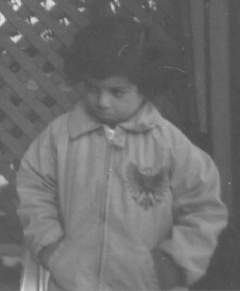

In [9]:
# pout img
img2 = cv2.imread(path_img2)
cv2_imshow(img2)

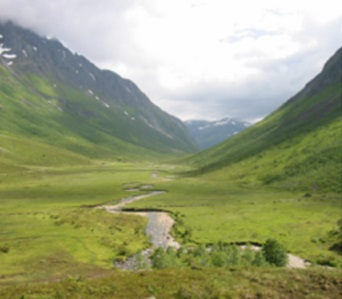

In [10]:
#field img
img3 = cv2.imread(path_img3)
cv2_imshow(img3)

In [11]:
img_bc1 = brightness_and_contrast(img2)

* Enter the alpha value: 1.5
* Enter the beta value: 20


In [12]:
img_bc2 = brightness_and_contrast(img3)

* Enter the alpha value: 2
* Enter the beta value: -90


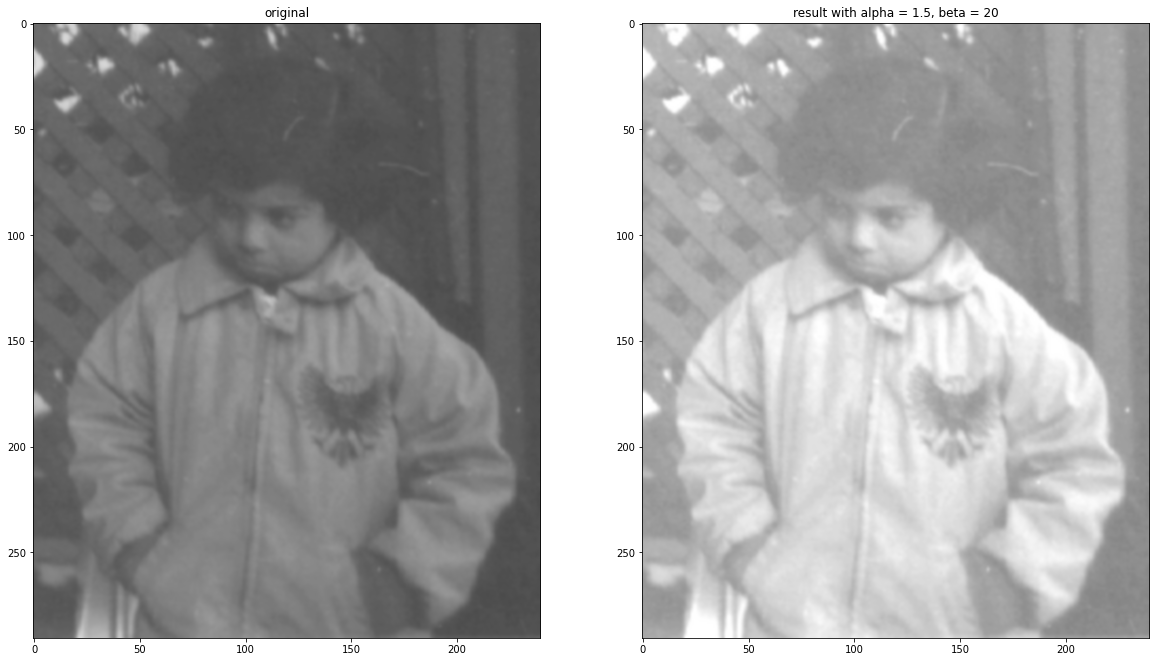

In [13]:
show(img2, img_bc1, "original", "result with alpha = 1.5, beta = 20")

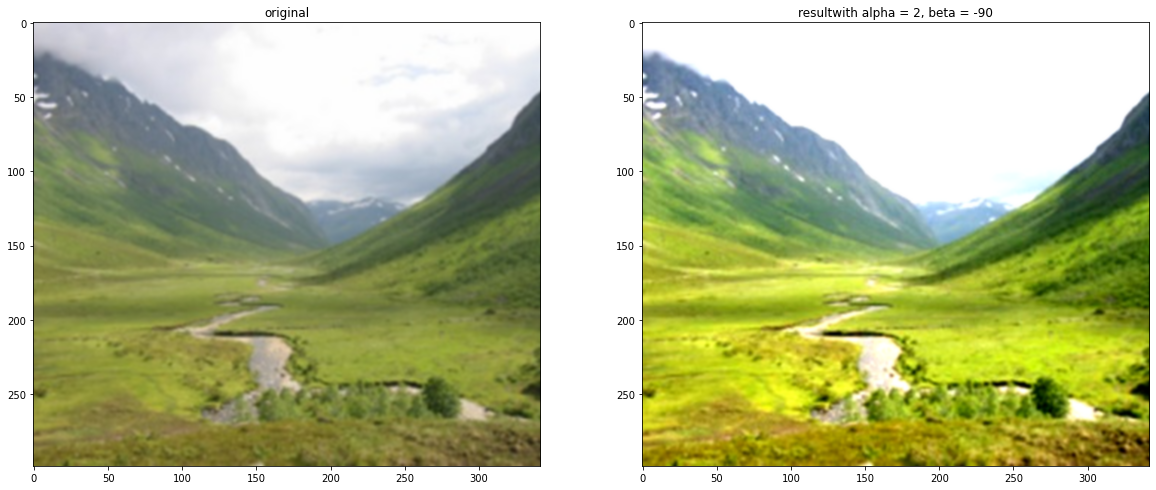

In [14]:
show(img3, img_bc2, "original", "resultwith alpha = 2, beta = -90")

# **Yêu cầu 3: Phép invert**

## Công thức: g (x, y) = L-1-f(x,y) với L: giá trị mức xám lớn nhất

In [15]:
def invert(f, L = 256): #L: giá trị mức xám lớn nhất
# công thức : g(x,y) = L-1-f(x,y)
    new_img = np.zeros(f.shape, f.dtype)
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            for k in range(f.shape[2]):
                new_img[i,j,k] = L-1-f[i,j,k]
    return new_img

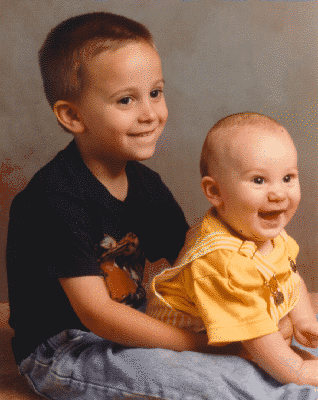

In [16]:
# kid img
img4 = cv2.imread(path_img4)
cv2_imshow(img4)

In [17]:
invert_img = invert(img4)

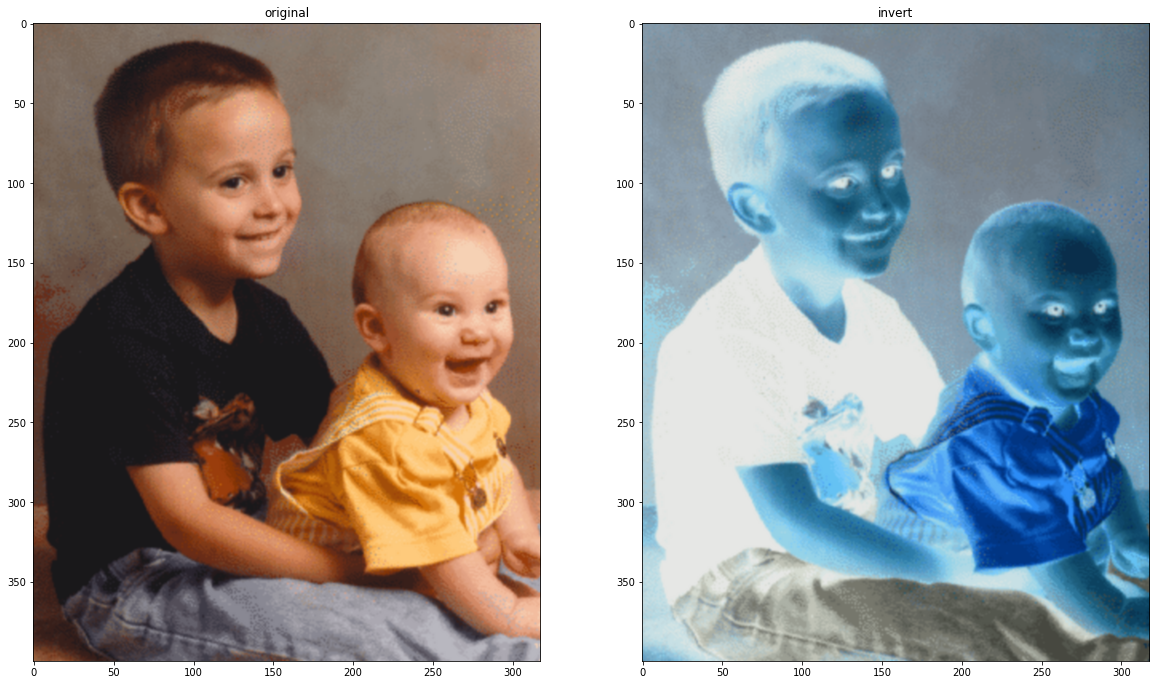

In [18]:
show(img4, invert_img, "original", "invert")

# **Yêu cầu 4: Điều chỉnh Gamma**

## Công thức: O = image ^ (1 / G) với image là ảnh đầu vào và G là giá trị gamma. Ảnh đầu ra O sau đó được thu nhỏ trở lại phạm vi [0, 255].


Các giá trị gamma < 1 sẽ chuyển hình ảnh về phía cuối tối hơn của quang phổ trong khi các giá trị gamma > 1 sẽ làm cho hình ảnh sáng hơn. Giá trị gamma của G = 1 sẽ không ảnh hưởng đến hình ảnh đầu vào (giữ nguyên).

In [19]:
def gamma_correction(f):
    gamma = float(input('* Enter the gamma value: '))
    new_img = np.array(((f / 255.0) ** gamma) * 255).astype(np.uint8)

    return new_img

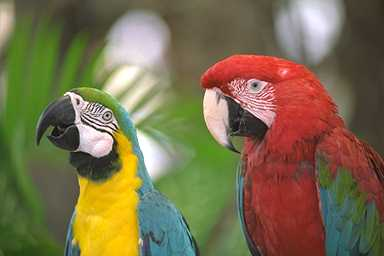

In [20]:
# en_orig img
img5 = cv2.imread(path_img5)
cv2_imshow(img5)

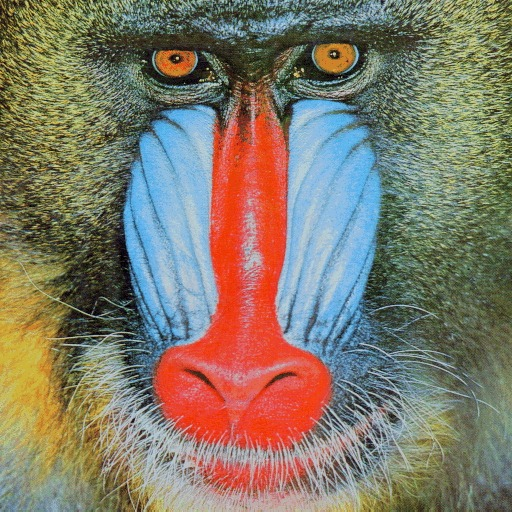

In [21]:
# mandril img
img6 = cv2.imread(path_img6)
cv2_imshow(img6)

In [22]:
gamma_img1 = gamma_correction(img5)

* Enter the gamma value: 1.5


In [23]:
gamma_img2 = gamma_correction(img6)

* Enter the gamma value: 0.5


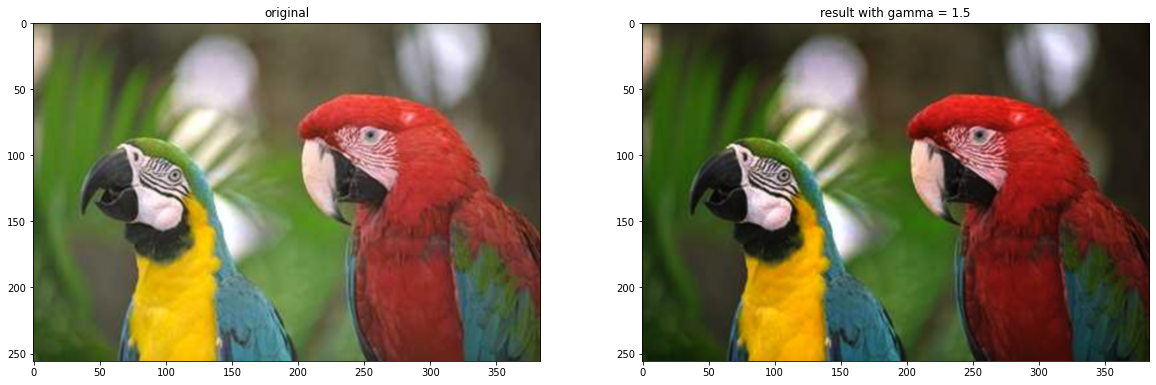

In [24]:
show(img5, gamma_img1, "original", "result with gamma = 1.5")

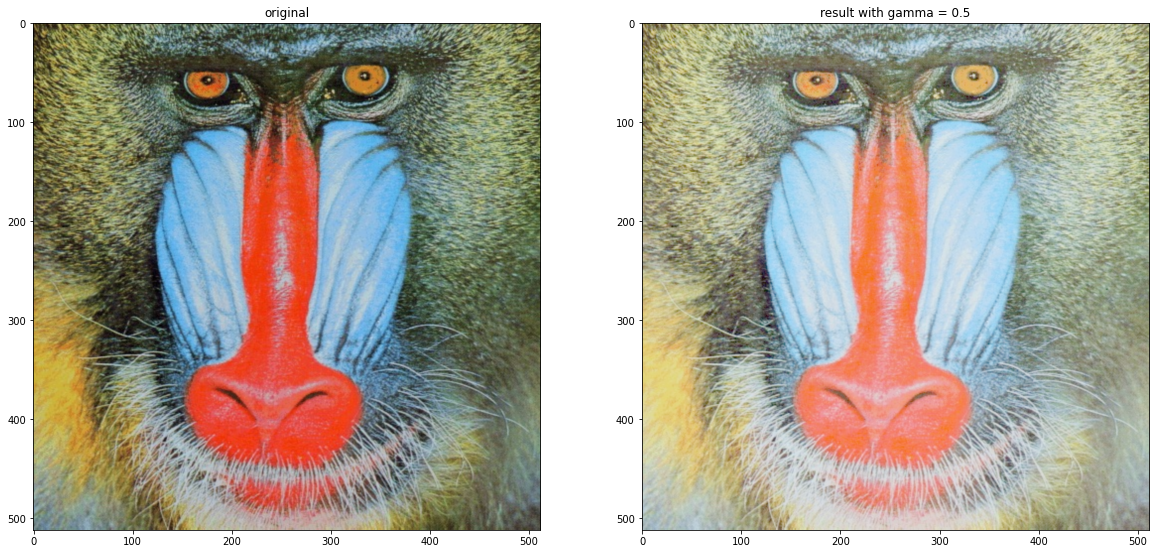

In [25]:
show(img6, gamma_img2, "original", "result with gamma = 0.5")